<a href="https://colab.research.google.com/github/mboya2020/Craigslist-Vehicles-Analysis/blob/main/craiglist_vehicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@author: Patriciah N. Mboya

Github: https://github.com/mboya2020 LinkedIn: https://www.linkedin.com/in/patriciah-mboya/

Email:mboyapatricia@ymail.com

### ***`1. DATA EXPLORATION`***

In [ ]:
# connect collab to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### ***`1.1 Libraries`***

In [ ]:
# import relevant libraries

import pandas as pd
import numpy as np

#viz tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn tools

from sklearn.preprocessing import MinMaxScaler

# statsmodel

from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from scipy.stats import zscore

#### ***`1.2 Data loading and exploration`***

In [ ]:
# change directory

%cd "/content/drive/MyDrive/Colab Notebooks/Data Engineer Assessment"

# specify the path to the csv file

file_name = "craigslist_vehicles.csv"
file_path = f"/content/drive/MyDrive/Colab Notebooks/Data Engineer Assessment/{file_name}"
print(file_path)

# read the csv file into a dataFrame

df = pd.read_csv(file_path)

# display basic information about the dataset

print("\nDataset Info:")
print(df.info())

# display the first few rows of the dataset

print("\nFirst few rows:")
print(df.head())

/content/drive/MyDrive/Colab Notebooks/Data Engineer Assessment
/content/drive/MyDrive/Colab Notebooks/Data Engineer Assessment/craigslist_vehicles.csv

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    426880 non-null  int64  
 1   id            426880 non-null  int64  
 2   url           426880 non-null  object 
 3   region        426880 non-null  object 
 4   region_url    426880 non-null  object 
 5   price         426880 non-null  int64  
 6   year          425675 non-null  float64
 7   manufacturer  409234 non-null  object 
 8   model         421603 non-null  object 
 9   condition     252776 non-null  object 
 10  cylinders     249202 non-null  object 
 11  fuel          423867 non-null  object 
 12  odometer      422480 non-null  float64
 13  title_status  418638 non-null  object 
 14  transmission 

In [ ]:
# convert posting date column to datetime

df['posting_date'] = pd.to_datetime(df['posting_date'])

# set date as the index
df.set_index('posting_date', inplace=True)


### ***`2. DATA CLEANING`***

#### ***`2.1 Missing values`***

In [ ]:
# check for missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
removal_date        68
dtype: int64


#### ***`2.2 Handling missing values`***

In [ ]:
# handle missing values for categorical columns

df['manufacturer'].fillna(df['manufacturer'].mode()[0], inplace=True)
df['model'].fillna(df['model'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)
df['fuel'].fillna(df['fuel'].mode()[0], inplace=True)
df['title_status'].fillna(df['title_status'].mode()[0], inplace=True)
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['VIN'].fillna(df['VIN'].mode()[0], inplace=True)
df['drive'].fillna(df['drive'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['paint_color'].fillna(df['paint_color'].mode()[0], inplace=True)
df['condition'].fillna(df['condition'].mode()[0], inplace=True)
df['image_url'].fillna(df['image_url'].mode()[0], inplace=True)
df['description'].fillna(df['description'].mode()[0], inplace=True)
df['removal_date'].fillna(df['removal_date'].mode()[0], inplace=True)

# handle missing values for numerical columns

df['price'].fillna(df['price'].mode()[0], inplace=True)
df['odometer'].fillna(df['odometer'].mode()[0], inplace=True)
df['year'].fillna(df['year'].mode()[0], inplace=True)

In [ ]:
# drop missing values for latitudes and longitudes

df.dropna(subset=['lat'], inplace=True)
df.dropna(subset=['long'], inplace=True)


#### ***`2.3 Handling outliers`***

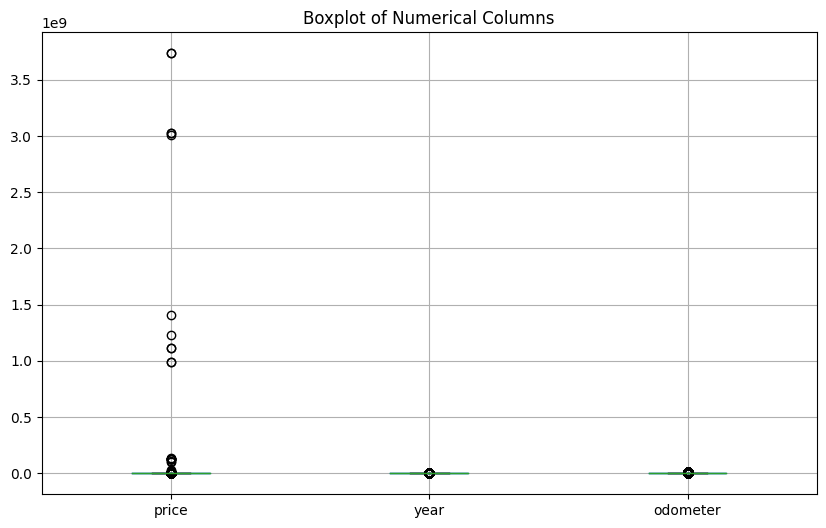

In [ ]:
# check for and handle outliers for numerical colmns

plt.figure(figsize=(10, 6))
df.boxplot(column=['price', 'year', 'odometer'])
plt.title('Boxplot of Numerical Columns')
plt.show()

In [ ]:
# define a function to handle outliers using a threshold

def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].median(), df[column])

# apply the function to relevant columns
handle_outliers('price')
handle_outliers('odometer')

#### ***`2.4 Dropping irrelevant columns`***

In [ ]:
# remove any irrelevant columns

df = df.drop(['Unnamed: 0','county'], axis=1)

#### ***`2.5 Handling duplicate values`***

In [ ]:
# handle duplicate values

df = df.drop_duplicates()

In [ ]:
# confirm no missing values

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
id              0
url             0
region          0
region_url      0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
image_url       0
description     0
state           0
lat             0
long            0
removal_date    0
dtype: int64


### ***`3. FEATURE ENGINEERING AND SELECTION`***

#### ***`3.1 extracting date information`***

In [ ]:
# extract year, month, and day from 'posting_date'

df['year_posted'] = df.index.year
df['month_posted'] = df.index.month
df['day_posted'] = df.index.day

#### ***`3.2 Feature scaling`***

In [ ]:
# scale the data

numerical_columns = ['price', 'year', 'odometer', 'lat', 'long']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

### ***`4. EXPLANATORY DATA ANALYSIS (EDA)`***

#### ***`4.1 Summary Statistics`***

In [ ]:
# calculate summary statistics

summary_stats = df.describe()
print(summary_stats)



                 id          price           year       odometer  \
count  4.203310e+05  420331.000000  420331.000000  420331.000000   
mean   7.311504e+09       0.285061       0.911583       0.322231   
std    4.384679e+06       0.226482       0.077801       0.215369   
min    7.301583e+09       0.000000       0.000000       0.000000   
25%    7.308142e+09       0.104246       0.885246       0.136871   
50%    7.312675e+09       0.243439       0.926230       0.308185   
75%    7.315258e+09       0.435068       0.959016       0.470451   
max    7.317101e+09       1.000000       1.000000       1.000000   

                 lat           long  year_posted   month_posted     day_posted  
count  420331.000000  420331.000000     420331.0  420331.000000  420331.000000  
mean       38.493940     -94.748599       2021.0       4.267220      15.367855  
std         5.841533      18.365462          0.0       0.442509      10.111171  
min       -84.122245    -159.827728       2021.0       4.000000

#### ***`4.2 Distribution of listings over time`***

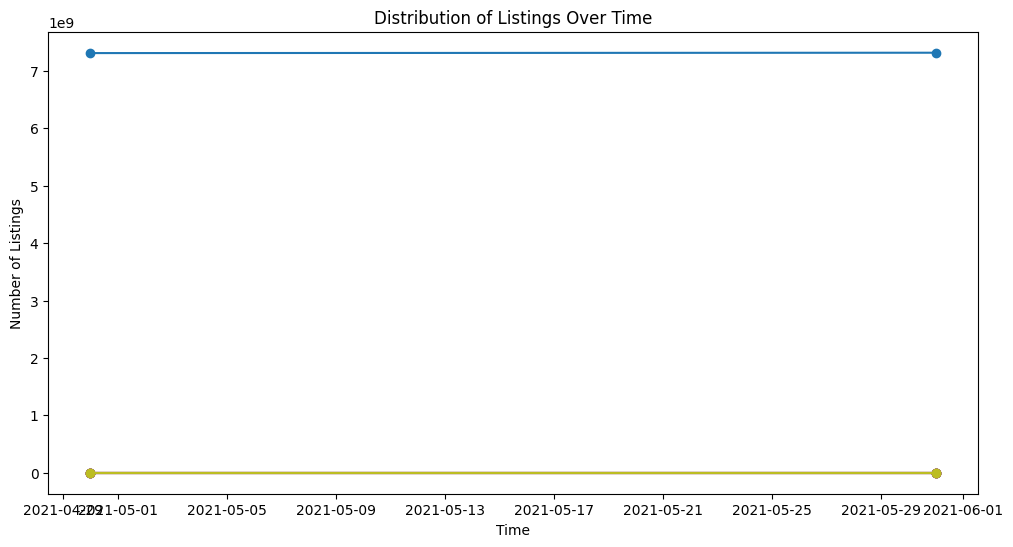

In [ ]:
# visualize the distribution of listings over time

plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled.values, marker='o')
plt.title('Distribution of Listings Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Listings');



### ***`5. CREATING TIME SERIES CHARTS`***

#### ***`5.1 Inventory Analysis Over Time`***

In [ ]:
# resample the data to monthly

df_resampled = df.resample('M').mean()

<ipython-input-26-251144e3a2c8>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('M').mean()


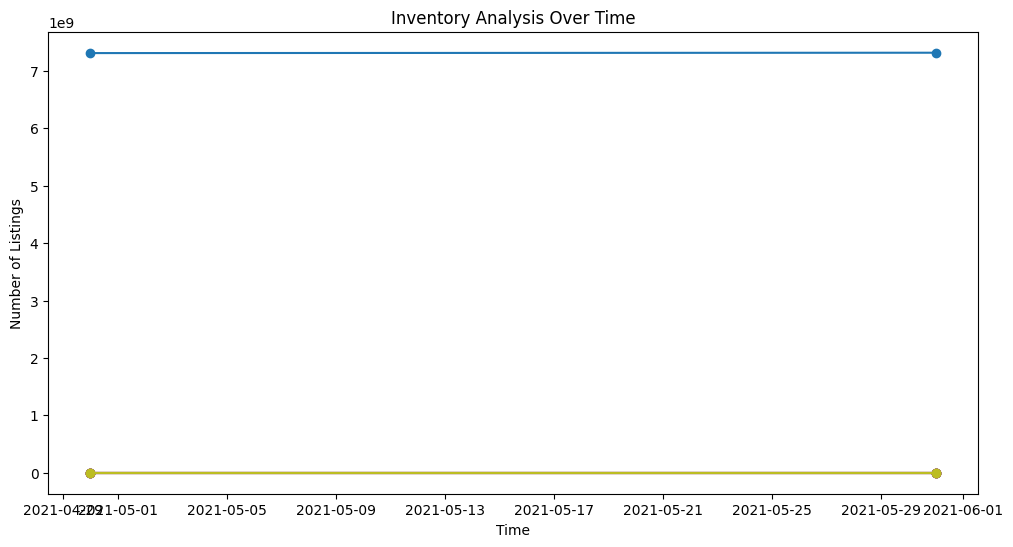

In [ ]:
# visualize the inventory analysis over time

plt.figure(figsize=(12, 6))
plt.plot(df_resampled.index, df_resampled.values, marker='o')
plt.title('Inventory Analysis Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Listings');


#### ***`5.2 Segmentation by region`***

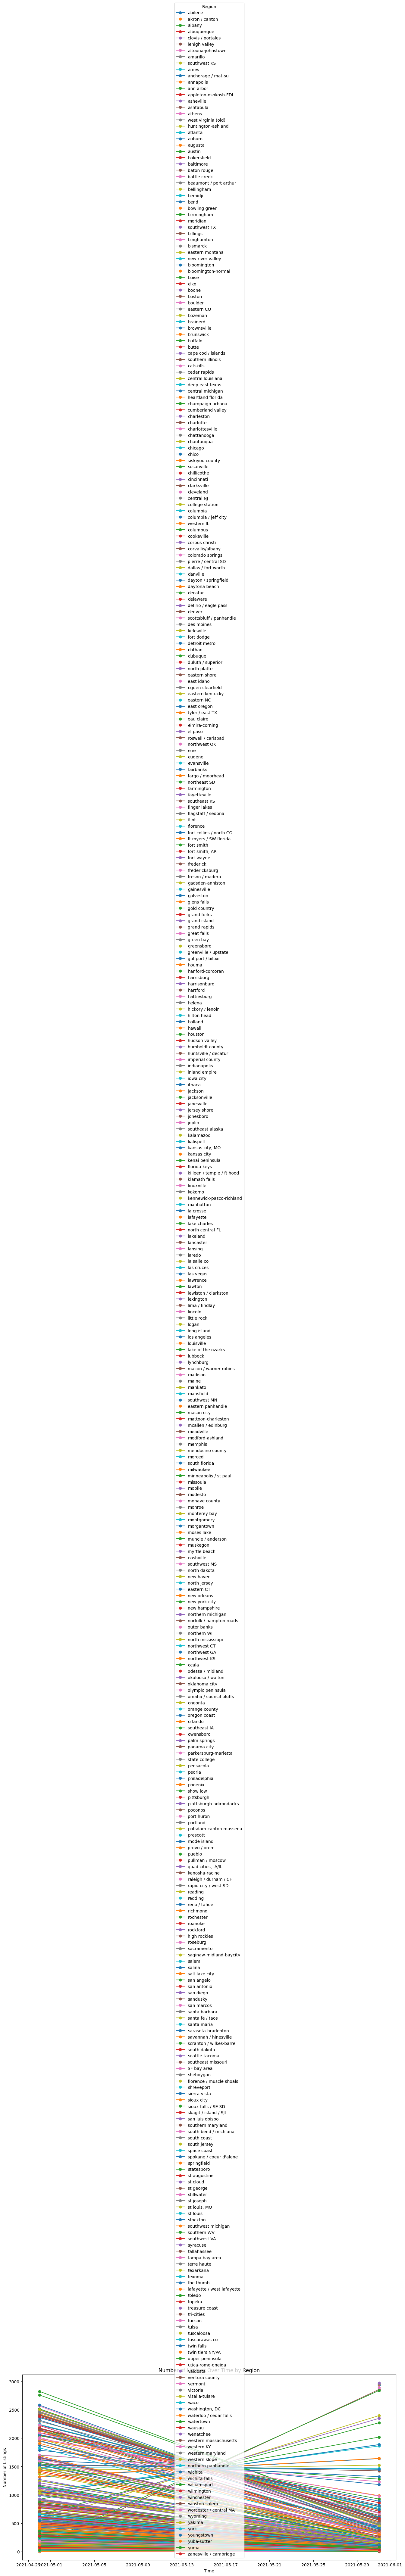

In [ ]:
# Segmentation by Regions
regions = df['region'].unique()
plt.figure(figsize=(16, 8))
for region in regions:
    df_region = df[df['region'] == region].resample('M').size()
    plt.plot(df_region.index, df_region.values, label=region, marker='o')

plt.title('Number of Listings Over Time by Region')
plt.xlabel('Time')
plt.ylabel('Number of Listings')
plt.legend(title='Region')
plt.show()

#### ***`5.3 Listing by vehicle type`***

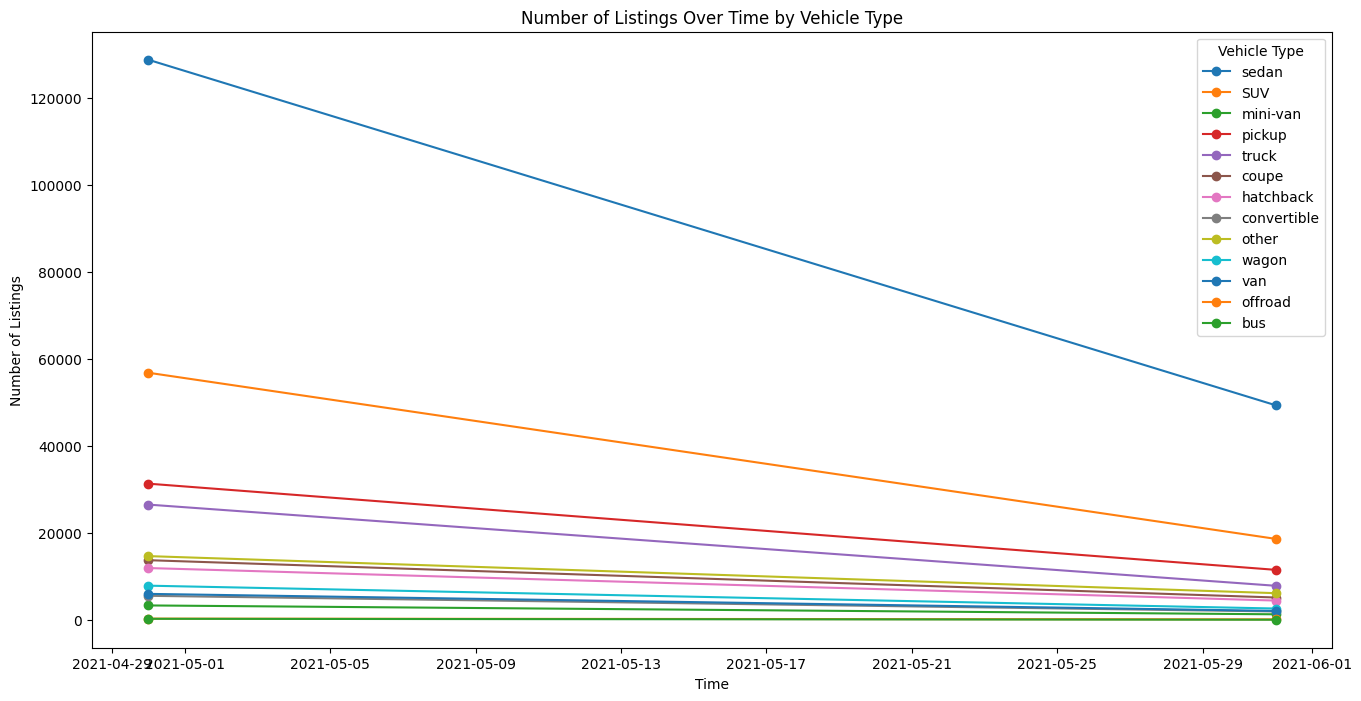

In [ ]:
vehicle_types = df['type'].unique()
plt.figure(figsize=(16, 8))
for vehicle_type in vehicle_types:
    df_type = df[df['type'] == vehicle_type].resample('M').size()
    plt.plot(df_type.index, df_type.values, label=vehicle_type, marker='o')

plt.title('Number of Listings Over Time by Vehicle Type')
plt.xlabel('Time')
plt.ylabel('Number of Listings')
plt.legend(title='Vehicle Type');


#### ***`5.4 Seasonal Trends`***

<ipython-input-30-7e92dcd3109a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  seasonal_trends = df.resample('M').mean()


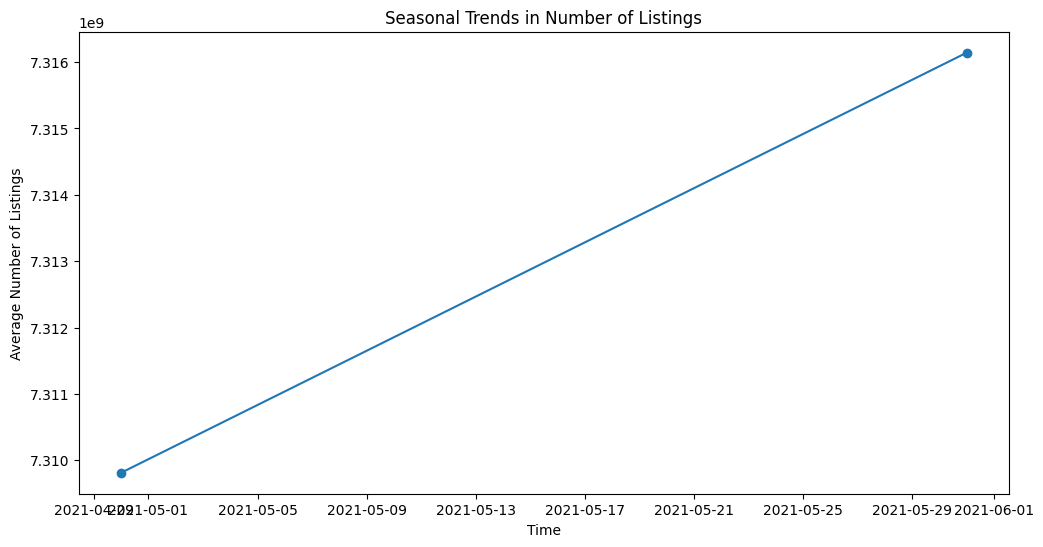

In [ ]:
# Seasonal Trends
seasonal_trends = df.resample('M').mean()
plt.figure(figsize=(12, 6))
plt.plot(seasonal_trends.index, seasonal_trends['id'], marker='o')
plt.title('Seasonal Trends in Number of Listings')
plt.xlabel('Time')
plt.ylabel('Average Number of Listings')
plt.show()

### ***`6. FUTURE FORECAST`***

In [ ]:
# Load a subset of your dataset

df_subset = df.head(1000)

# Forecasting for Future Planning - SARIMA Model

model = SARIMAX(df_subset['id'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
forecast_steps = 6
forecast = results.get_forecast(steps=forecast_steps)


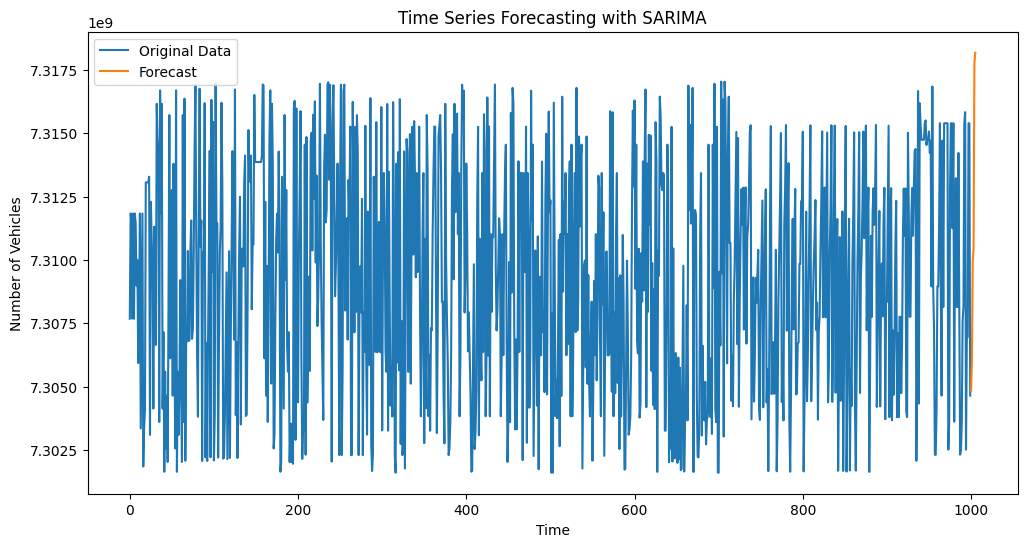

In [ ]:
# plot data and forecast

plt.figure(figsize=(12, 6))
plt.plot(df_subset['id'], label='Original Data')
plt.plot(forecast.predicted_mean, label='Forecast')
plt.title('Time Series Forecasting with SARIMA')
plt.xlabel('Time')
plt.ylabel('Number of Vehicles')
plt.legend();